# Ejercicio: Generador de Gráficos Automático

## Instrucciones:
1. Crea una clase llamada `AutoPlot`.

2. La clase debe tener tres métodos principales:
   - `univariate_plot`: para gráficos univariantes.
   - `bivariate_plot`: para gráficos bivariantes.
   - `multivariate_plot`: para gráficos multivariantes.

3. Cada método debe recibir como argumentos:
   - `data`: un DataFrame de pandas que contiene los datos.
   - `variables`: una lista de nombres de columnas.
   - `types`: una lista de tipos correspondientes a cada columna (nominal, ordinal, continuo, discreto, fecha).
   
4. Los métodos deben seleccionar y generar automáticamente el gráfico más adecuado basado en los tipos de variables.

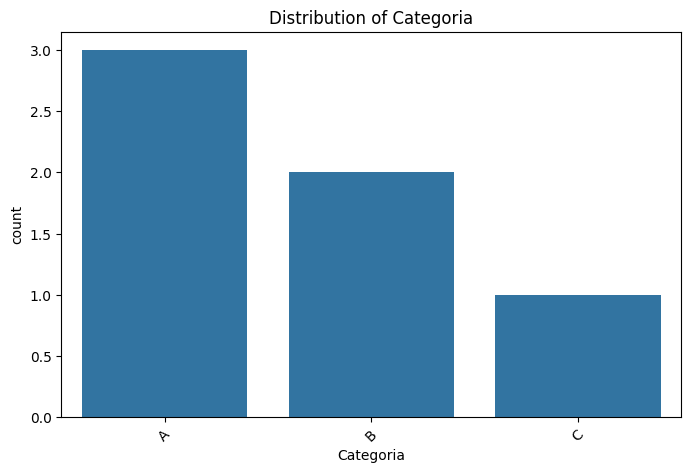

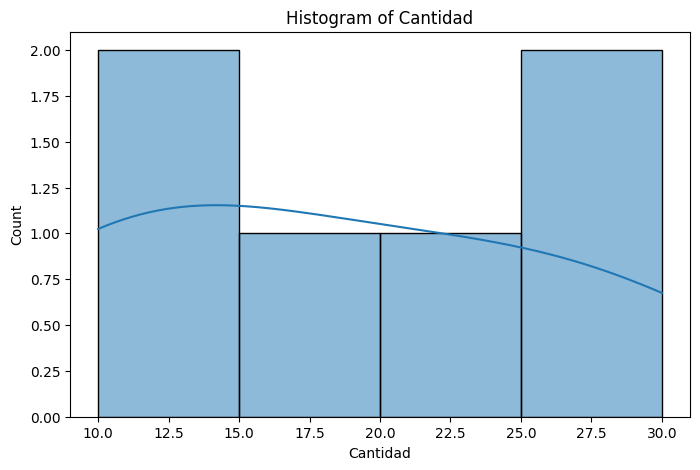

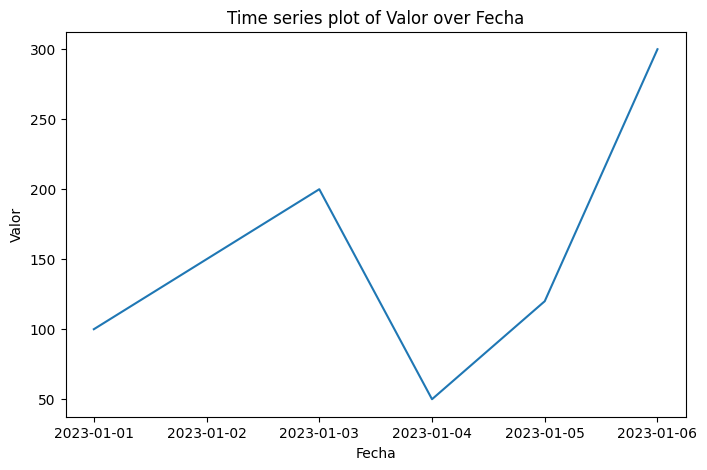

For multivariate plots, por lo menos tres variables se necesitan.


<Figure size 1000x800 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class Autoplot:
    def __init__(self):
        plt.style.use('default')
    
    def univariate_plot(self, data, variables, types):
        for variable, var_type in zip(variables, types):
            plt.figure(figsize=(8, 5))
            if var_type == "nominal" or var_type == "ordinal":
                sns.countplot(x=variable, data=data)
                plt.title(f'Distribution of {variable}')
                plt.xticks(rotation=45)
            elif var_type == "continuo" or var_type == "discreto":
                sns.histplot(data[variable], kde=True)
                plt.title(f'Histogram of {variable}')
            elif var_type == "fecha":
                data[variable] = pd.to_datetime(data[variable])
                data_sorted = data.sort_values(by=variable)
                sns.lineplot(x=data_sorted[variable], y=range(len(data_sorted)))
                plt.title(f'Time plot of {variable}')
            else:
                print(f"Unknown type '{var_type}' for variable '{variable}'.")
            plt.show()

    def bivariate_plot(self, data, variables, types):
        if len(variables) != 2:
            raise ValueError("Bivariate plots requiere exactamente 2 valores.")

        var1, var2 = variables
        type1, type2 = types

        plt.figure(figsize=(8, 5))

        if (type1 in ["nominal", "ordinal"] and type2 == "continuo") or (type2 in ["nominal", "ordinal"] and type1 == "continuo"):
            sns.boxplot(x=var1 if type1 in ["nominal", "ordinal"] else var2, y=var2 if type1 in ["nominal", "ordinal"] else var1, data=data)
            plt.title(f'Boxplot of {var1} and {var2}')
        elif type1 in ["continuo", "discreto"] and type2 in ["continuo", "discreto"]:
            sns.scatterplot(x=var1, y=var2, data=data)
            plt.title(f'Scatter plot of {var1} vs {var2}')
        elif (type1 in ["nominal", "ordinal"] and type2 in ["nominal", "ordinal"]):
            sns.heatmap(pd.crosstab(data[var1], data[var2]), annot=True, fmt='d')
            plt.title(f'Heatmap of {var1} and {var2}')
        elif type1 == "fecha" or type2 == "fecha":
            date_var = var1 if type1 == "fecha" else var2
            num_var = var2 if type1 == "fecha" else var1
            data[date_var] = pd.to_datetime(data[date_var])
            sns.lineplot(x=data[date_var], y=data[num_var])
            plt.title(f'Time series plot of {num_var} over {date_var}')
        else:
            print(f"Unsupported bivariate combination: {type1} and {type2}.")
        plt.show()

    def multivariate_plot(self, data, variables, types):
        if len(variables) < 3:
            print("Multivariate plots requiere al menos 2 valores.")
            return

        plt.figure(figsize=(10, 8))
        numeric_vars = [var for var, var_type in zip(variables, types) if var_type in ["continuo", "discreto"]]

        if len(numeric_vars) >= 3:
            sns.pairplot(data[numeric_vars].dropna())
            plt.suptitle('Pairplot of Numeric Variables', y=1.02)
        else:
            print("For multivariate plots, por lo menos tres variables se necesitan.")
        plt.show()



data = pd.DataFrame({
    'Categoria': ['A', 'B', 'A', 'C', 'B', 'A'],
    'Cantidad': [10, 20, 15, 10, 25, 30],
    'Fecha': pd.date_range('2023-01-01', periods=6),
    'Valor': [100, 150, 200, 50, 120, 300]
})

plotter = Autoplot()
plotter.univariate_plot(data, ['Categoria', 'Cantidad'], ['nominal', 'continuo'])
plotter.bivariate_plot(data, ['Fecha', 'Valor'], ['fecha', 'continuo'])
plotter.multivariate_plot(data, ['Cantidad', 'Valor', 'Fecha'], ['continuo', 'continuo', 'fecha'])
